In [81]:
from PyHessian.pyhessian.hessian import hessian
from PyHessian.density_plot import get_esd_plot
from hessian_utils import *
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
# from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time

# PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
# How to do this?
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
%matplotlib inline


In [82]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [83]:
mnist_trainset = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transforms.ToTensor())
mnist_fashion_trainset = datasets.FashionMNIST(root='./data/fashion_mnist', train=True, download=True, transform=transforms.ToTensor())
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms.ToTensor())
# Getting mnist test data
mnist_testset = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transforms.ToTensor())
mnist_fashion_testset = datasets.FashionMNIST(root='./data/fashion_mnist', train=False, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transforms.ToTensor())

torch.manual_seed(42)

Files already downloaded and verified
Files already downloaded and verified


In [84]:
train_X = cifar_trainset.data
train_y = cifar_trainset.targets
test_X = cifar_testset.data
test_y = cifar_testset.targets

In [85]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(10, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.linear = nn.Sequential(
            nn.Linear(16*8*8, 16),
            nn.ReLU(),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 16*8*8)
        x = self.linear(x)
        return x

In [86]:
train_X = torch.tensor(train_X).permute(0, 3, 1, 2).float()
test_X = torch.tensor(test_X).permute(0, 3, 1, 2).float()
train_X = (train_X / 255.0).to(device)
test_X = (test_X / 255.0).to(device)
train_y = torch.tensor(train_y, dtype=torch.int64).to(device)
test_y = torch.tensor(test_y, dtype=torch.int64).to(device)
val_x = train_X[:1000]
val_y = train_y[:1000]
x_samples = train_X[:50]
y_samples = train_y[:50]

In [87]:
dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_X, train_y),
    batch_size=32, shuffle=True)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

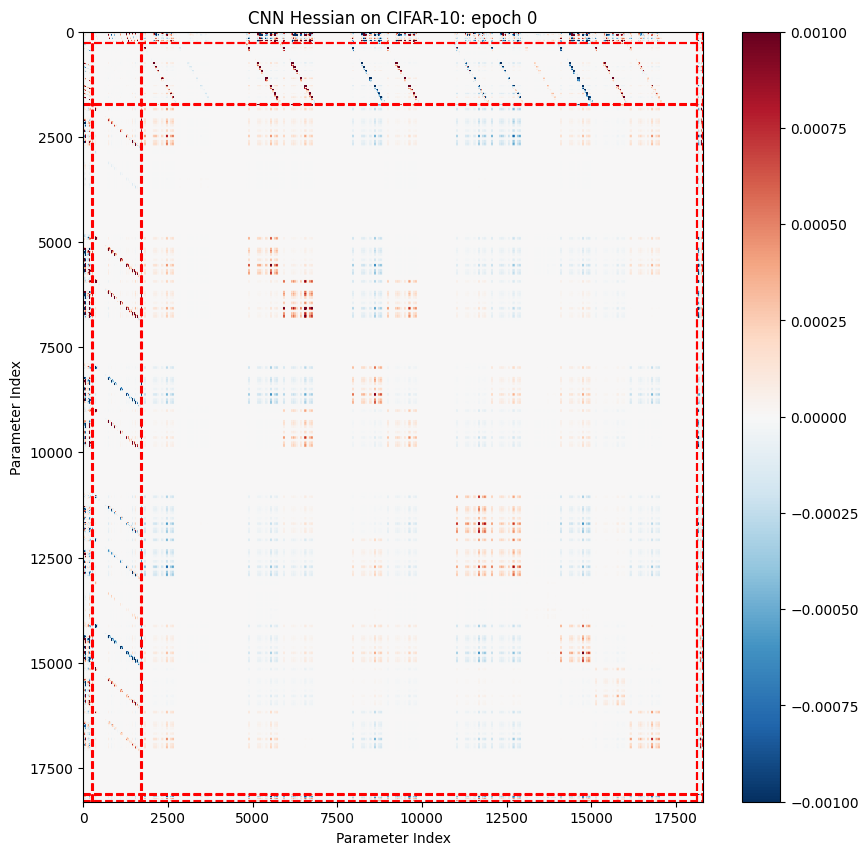

Epoch 0, step 0, train_loss 2.3399784564971924, test_loss 2.3056094646453857
Epoch 0, step 500, train_loss 2.1366212368011475, test_loss 1.8197658061981201
Epoch 0, step 1000, train_loss 1.8837052583694458, test_loss 1.6909234523773193
Epoch 0, step 1500, train_loss 1.5143173933029175, test_loss 1.6408262252807617


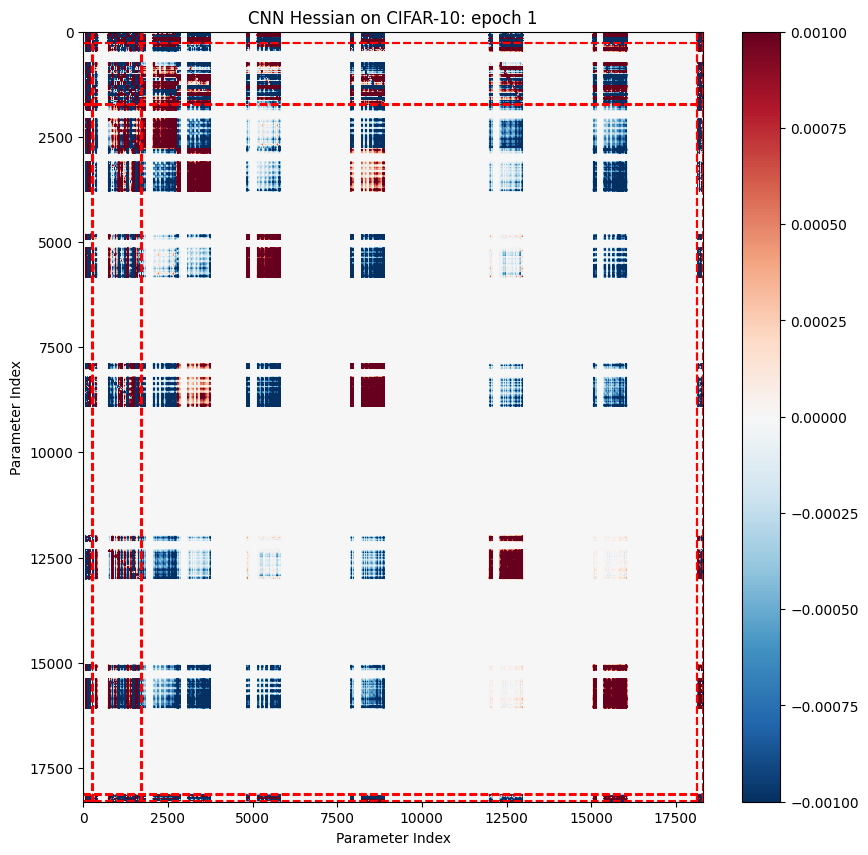

Epoch 1, step 0, train_loss 1.4201791286468506, test_loss 1.5966092348098755
Epoch 1, step 500, train_loss 1.3364453315734863, test_loss 1.5304884910583496
Epoch 1, step 1000, train_loss 1.5251742601394653, test_loss 1.4861774444580078
Epoch 1, step 1500, train_loss 1.3239812850952148, test_loss 1.4666022062301636


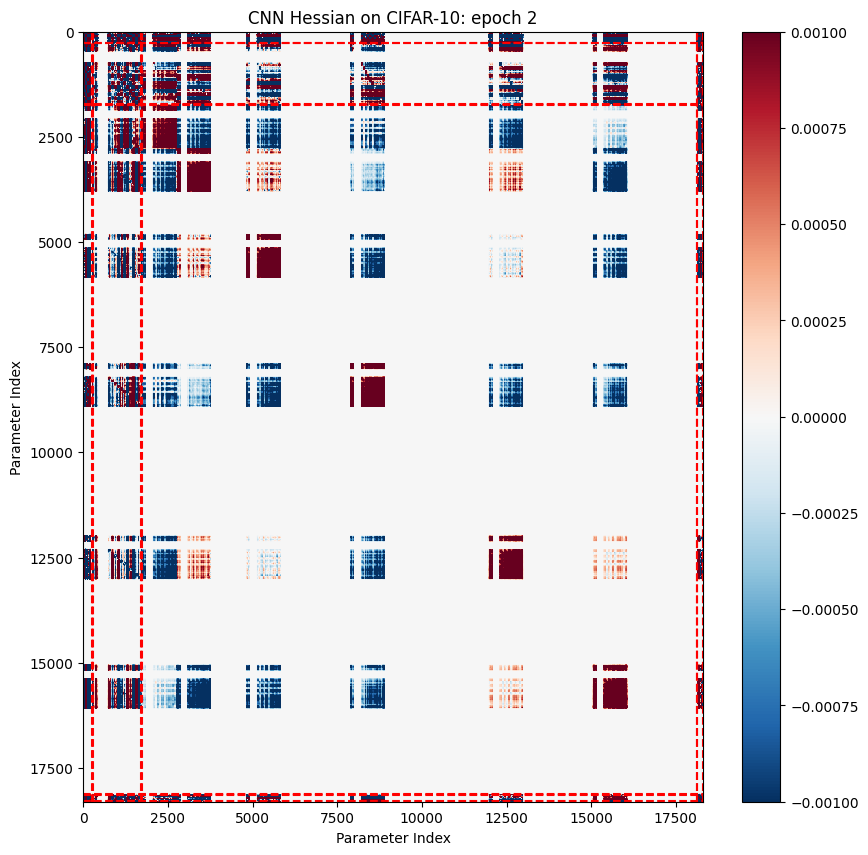

Epoch 2, step 0, train_loss 1.3972187042236328, test_loss 1.4346554279327393
Epoch 2, step 500, train_loss 1.3991374969482422, test_loss 1.415537714958191
Epoch 2, step 1000, train_loss 1.3494610786437988, test_loss 1.371472716331482
Epoch 2, step 1500, train_loss 1.6415590047836304, test_loss 1.387299656867981


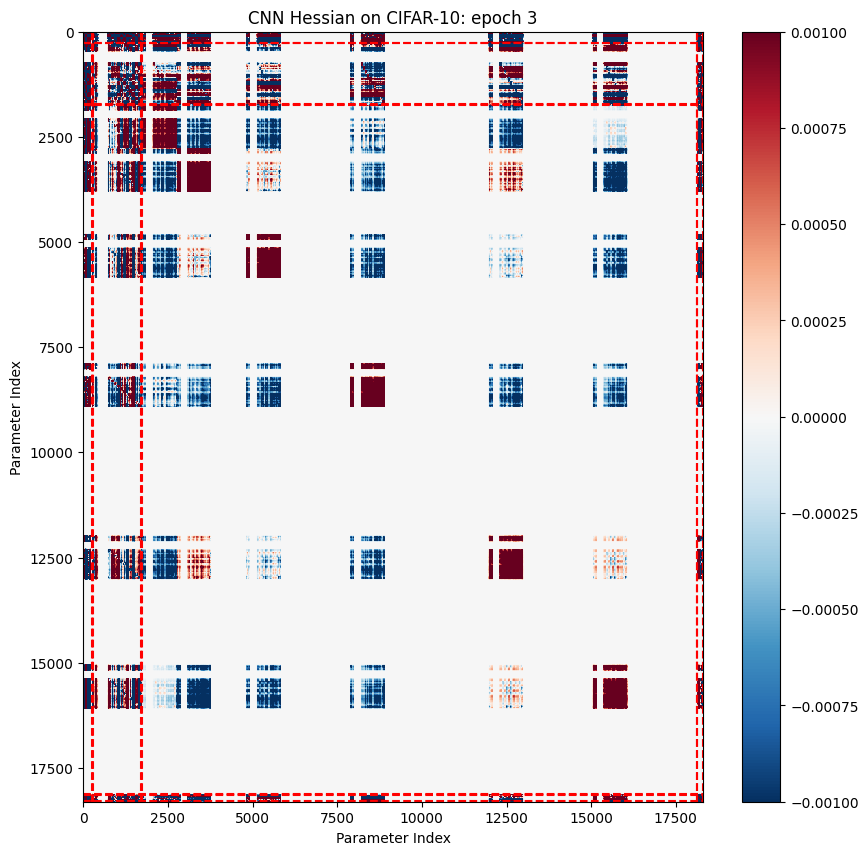

Epoch 3, step 0, train_loss 1.2501332759857178, test_loss 1.3607330322265625
Epoch 3, step 500, train_loss 1.327970266342163, test_loss 1.349005937576294
Epoch 3, step 1000, train_loss 1.4068834781646729, test_loss 1.3541524410247803
Epoch 3, step 1500, train_loss 1.065553069114685, test_loss 1.3275935649871826


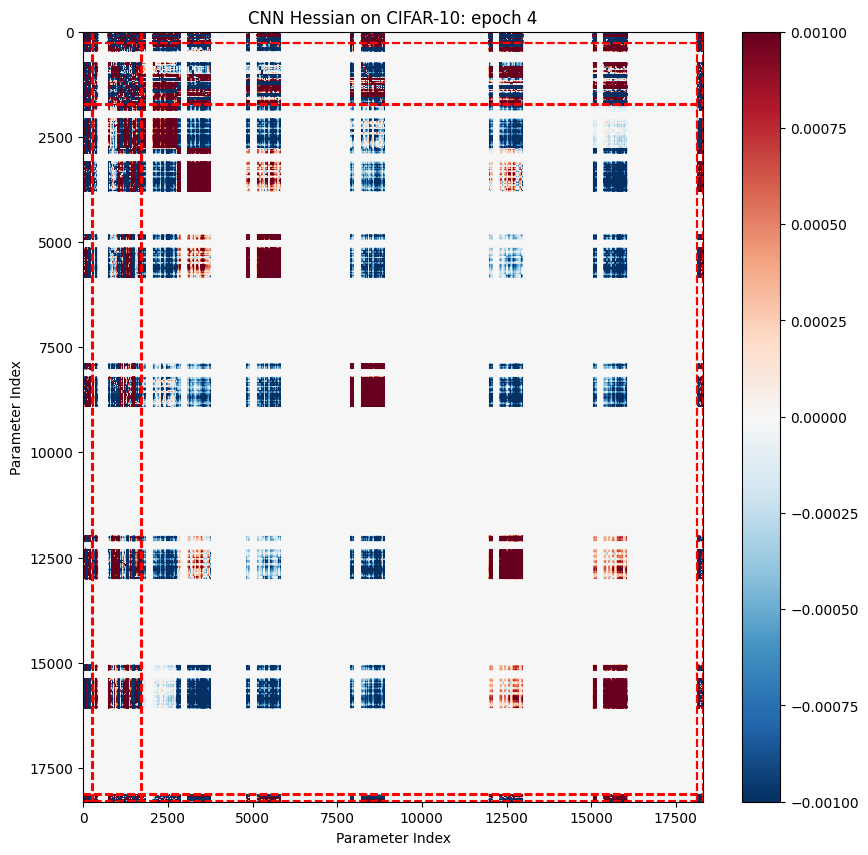

Epoch 4, step 0, train_loss 0.9846804141998291, test_loss 1.3178551197052002
Epoch 4, step 500, train_loss 1.1562066078186035, test_loss 1.3397153615951538
Epoch 4, step 1000, train_loss 1.4099091291427612, test_loss 1.2885942459106445
Epoch 4, step 1500, train_loss 1.2160836458206177, test_loss 1.318331003189087


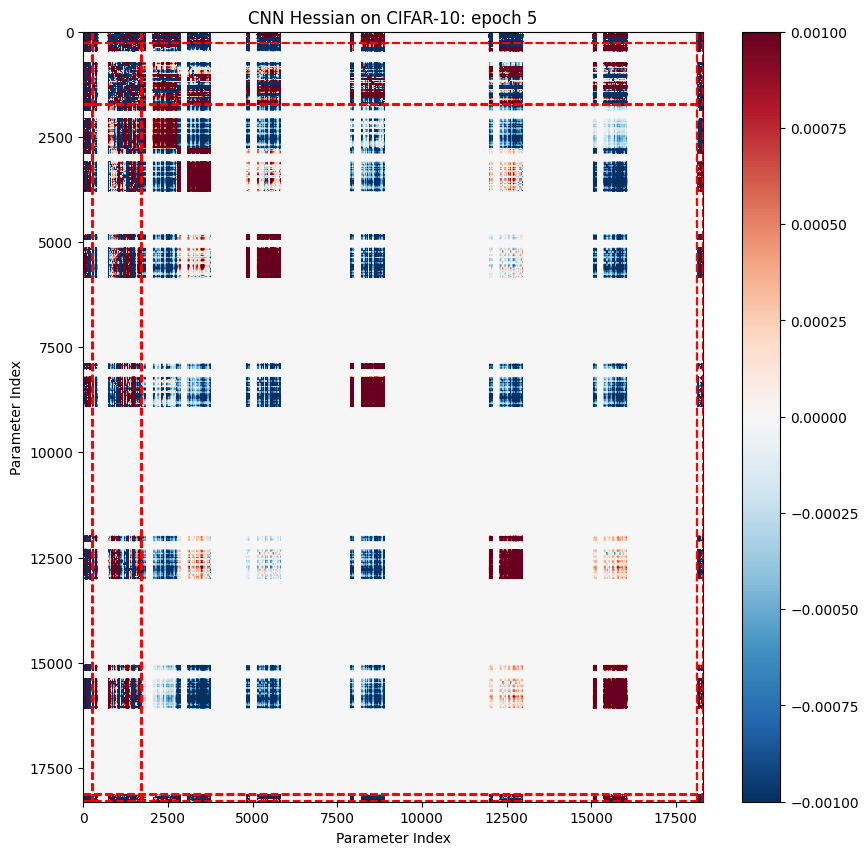

Epoch 5, step 0, train_loss 1.2273019552230835, test_loss 1.2963318824768066
Epoch 5, step 500, train_loss 1.2873111963272095, test_loss 1.2785598039627075
Epoch 5, step 1000, train_loss 1.2836376428604126, test_loss 1.252943992614746
Epoch 5, step 1500, train_loss 1.3397047519683838, test_loss 1.2522995471954346


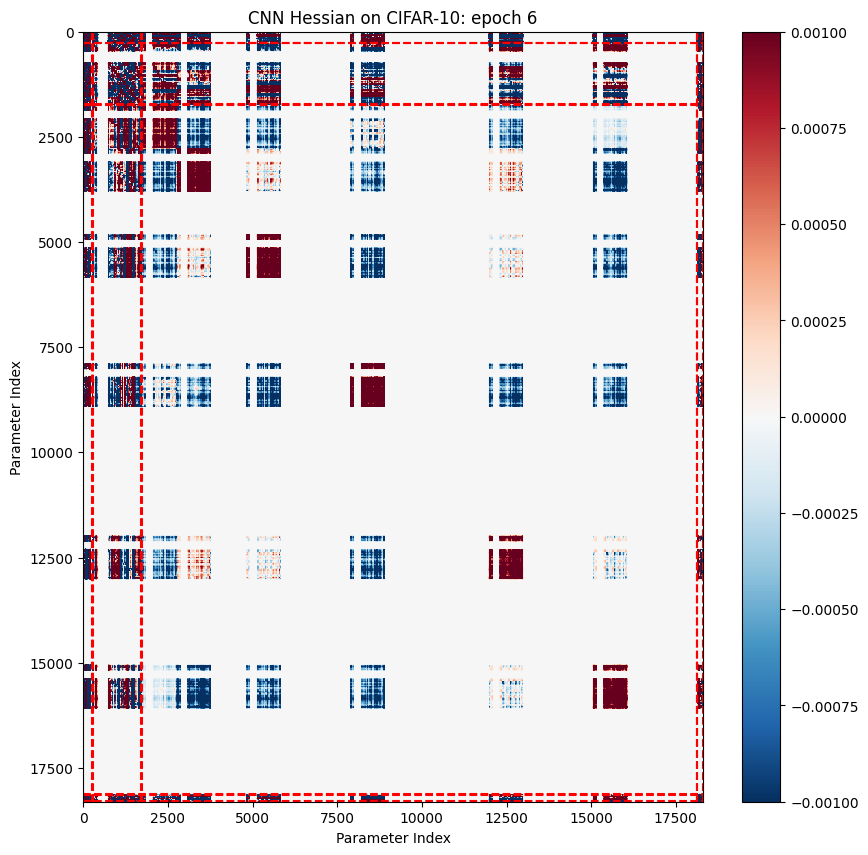

Epoch 6, step 0, train_loss 1.5965843200683594, test_loss 1.2666152715682983
Epoch 6, step 500, train_loss 1.5004209280014038, test_loss 1.242936134338379
Epoch 6, step 1000, train_loss 1.1104555130004883, test_loss 1.2564946413040161
Epoch 6, step 1500, train_loss 1.370686650276184, test_loss 1.2802633047103882


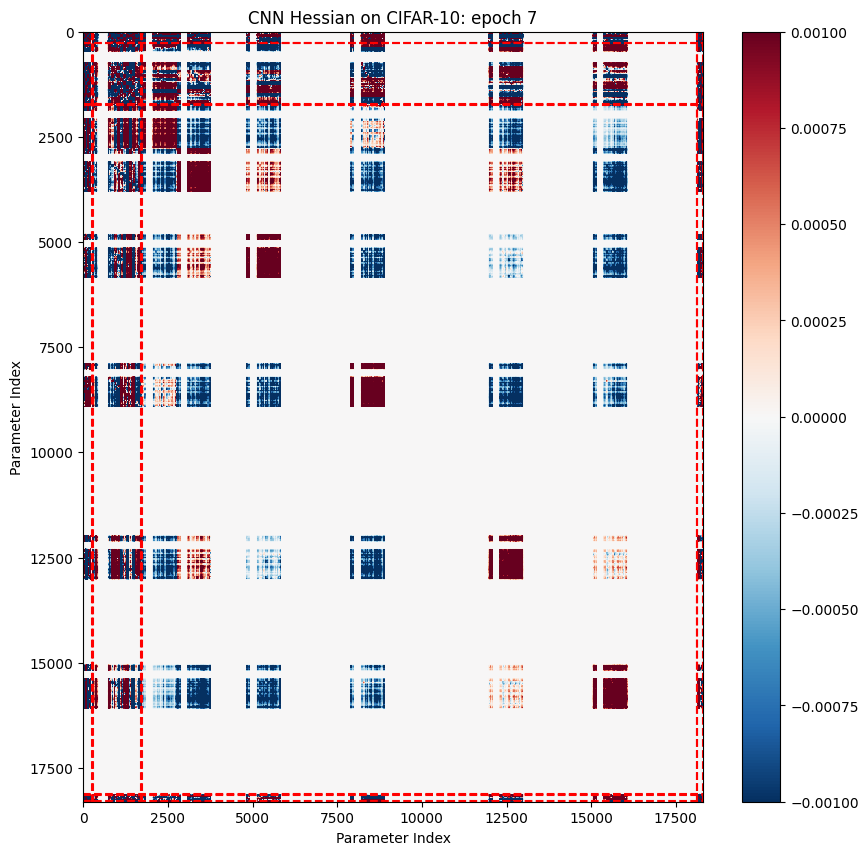

Epoch 7, step 0, train_loss 1.281175971031189, test_loss 1.2526627779006958
Epoch 7, step 500, train_loss 1.3025747537612915, test_loss 1.262144923210144
Epoch 7, step 1000, train_loss 0.9969819188117981, test_loss 1.221752643585205
Epoch 7, step 1500, train_loss 1.1216566562652588, test_loss 1.203875184059143


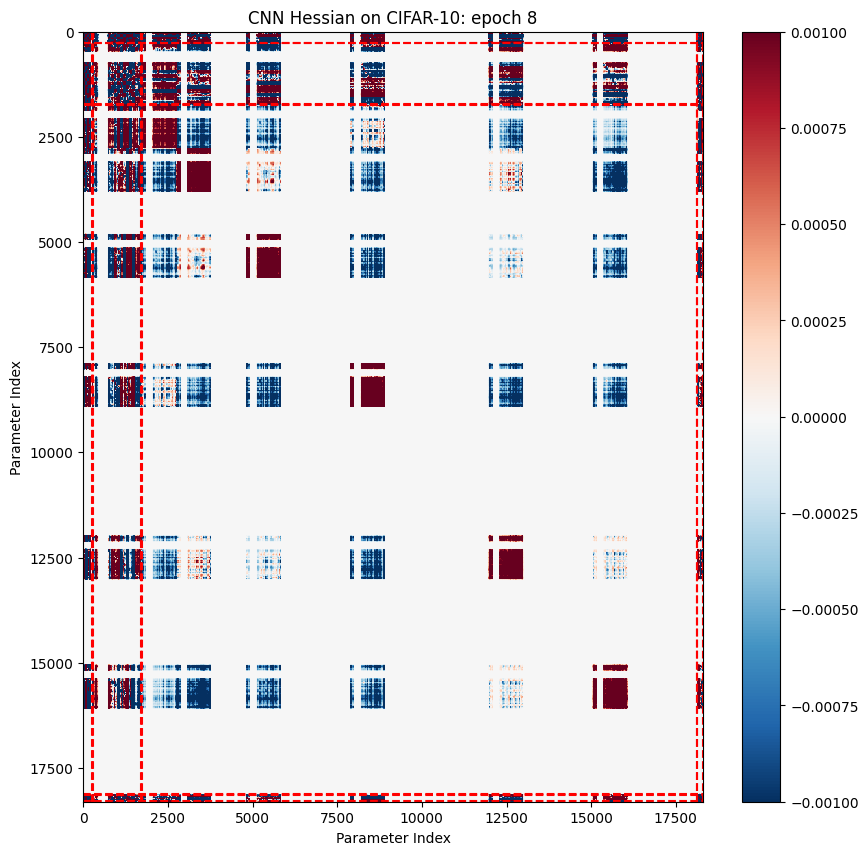

Epoch 8, step 0, train_loss 0.97801274061203, test_loss 1.2263844013214111
Epoch 8, step 500, train_loss 1.0939805507659912, test_loss 1.1971973180770874
Epoch 8, step 1000, train_loss 0.8464877605438232, test_loss 1.2608925104141235
Epoch 8, step 1500, train_loss 1.1733428239822388, test_loss 1.203476071357727


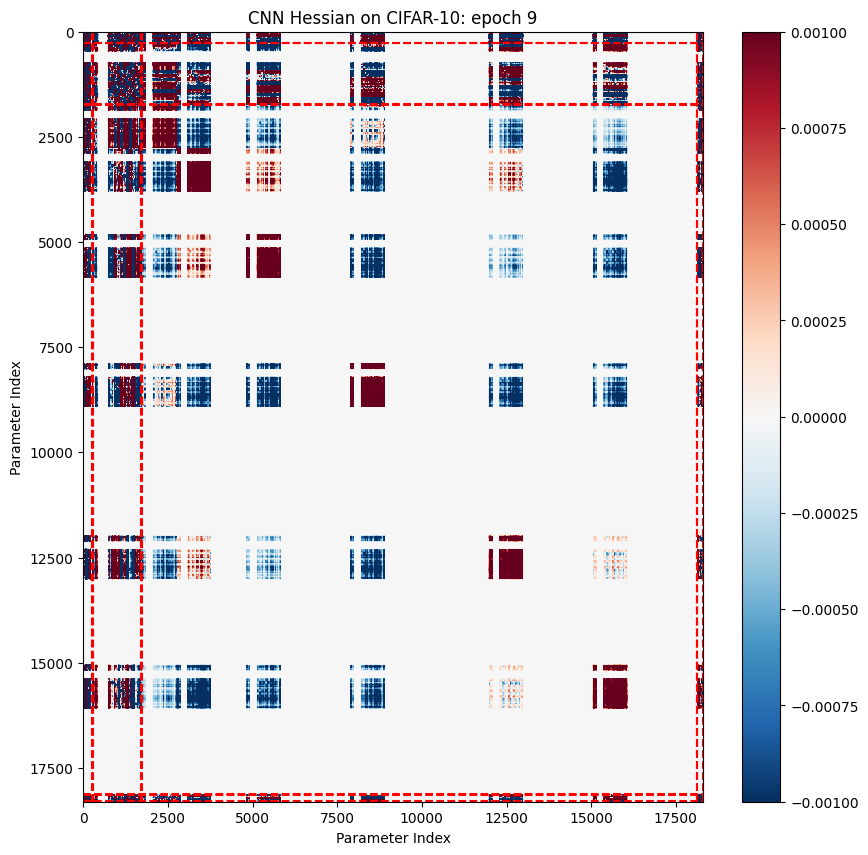

Epoch 9, step 0, train_loss 1.0730992555618286, test_loss 1.2178372144699097
Epoch 9, step 500, train_loss 1.244520664215088, test_loss 1.2219105958938599
Epoch 9, step 1000, train_loss 1.092504858970642, test_loss 1.218605637550354
Epoch 9, step 1500, train_loss 1.294744849205017, test_loss 1.1885141134262085


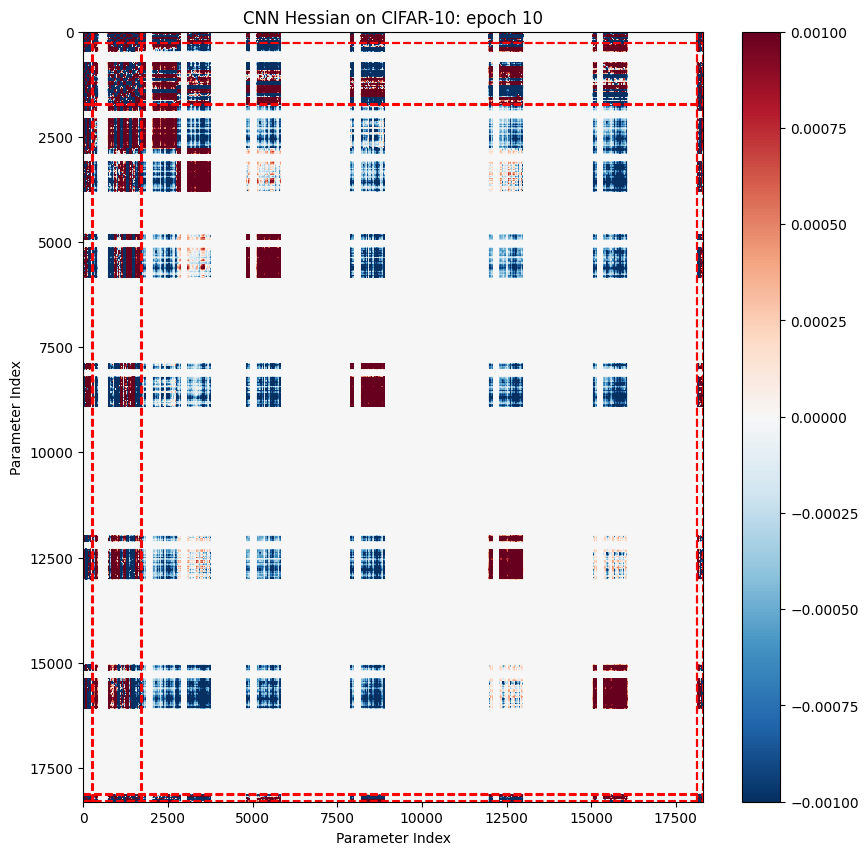

Epoch 10, step 0, train_loss 1.1969308853149414, test_loss 1.2044014930725098
Epoch 10, step 500, train_loss 1.2840749025344849, test_loss 1.1902214288711548
Epoch 10, step 1000, train_loss 1.094994068145752, test_loss 1.2101765871047974
Epoch 10, step 1500, train_loss 1.1089555025100708, test_loss 1.210839867591858


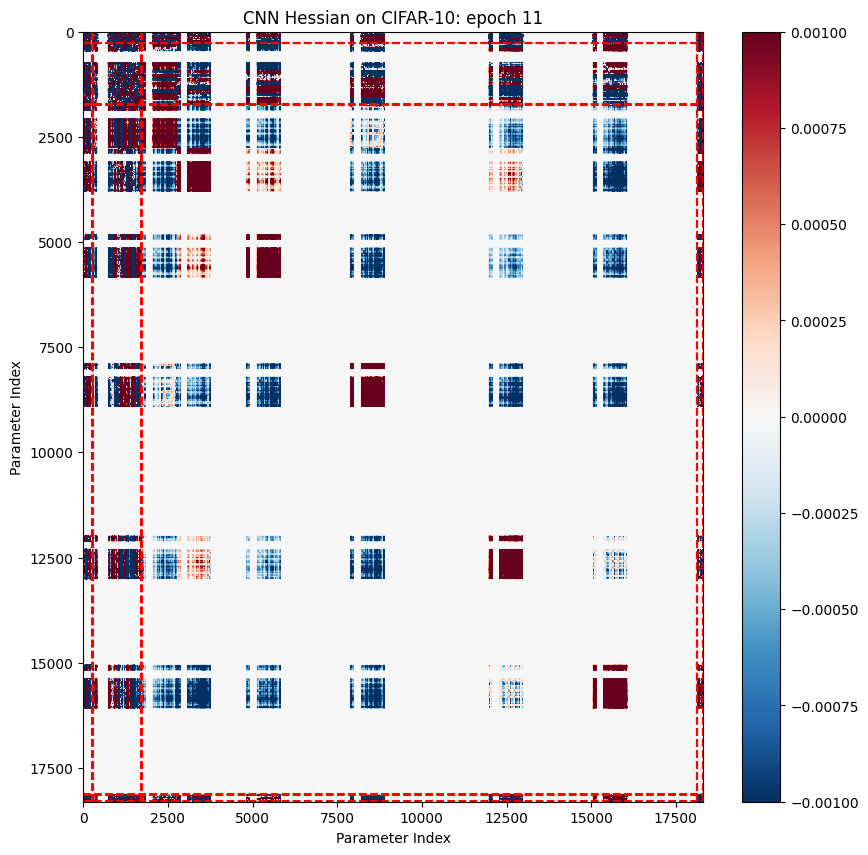

Epoch 11, step 0, train_loss 1.0567843914031982, test_loss 1.1622042655944824
Epoch 11, step 500, train_loss 0.9692963361740112, test_loss 1.183502197265625
Epoch 11, step 1000, train_loss 1.1474732160568237, test_loss 1.201402187347412
Epoch 11, step 1500, train_loss 1.2633837461471558, test_loss 1.1929001808166504


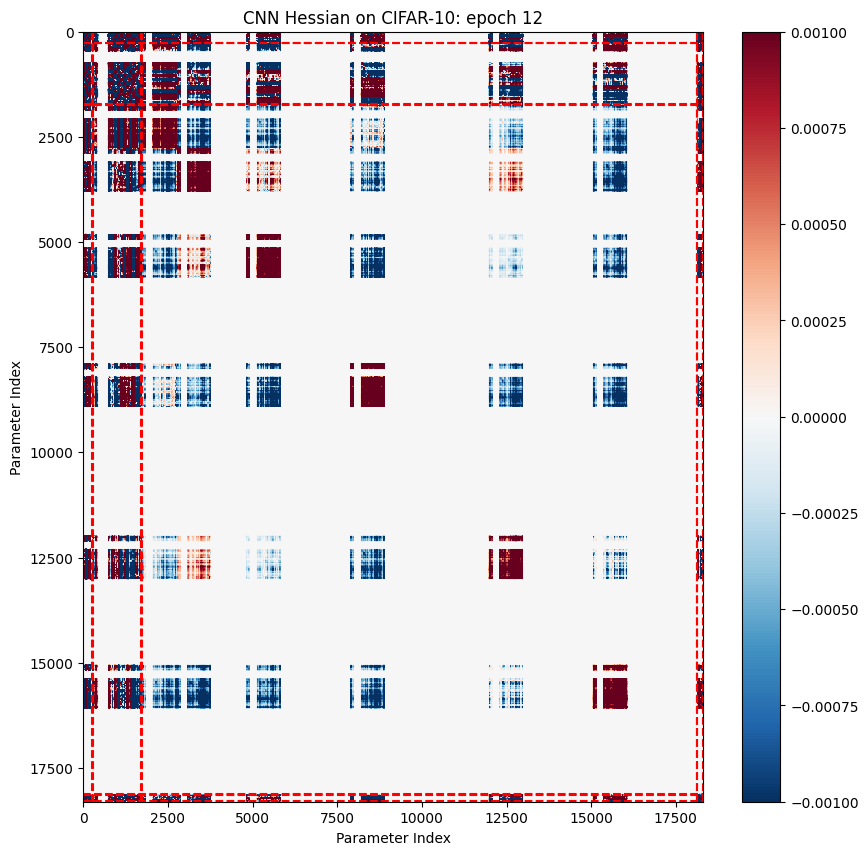

Epoch 12, step 0, train_loss 0.8443276286125183, test_loss 1.1653742790222168
Epoch 12, step 500, train_loss 1.3533992767333984, test_loss 1.1799026727676392
Epoch 12, step 1000, train_loss 1.1209566593170166, test_loss 1.2503167390823364
Epoch 12, step 1500, train_loss 1.0073089599609375, test_loss 1.147743821144104


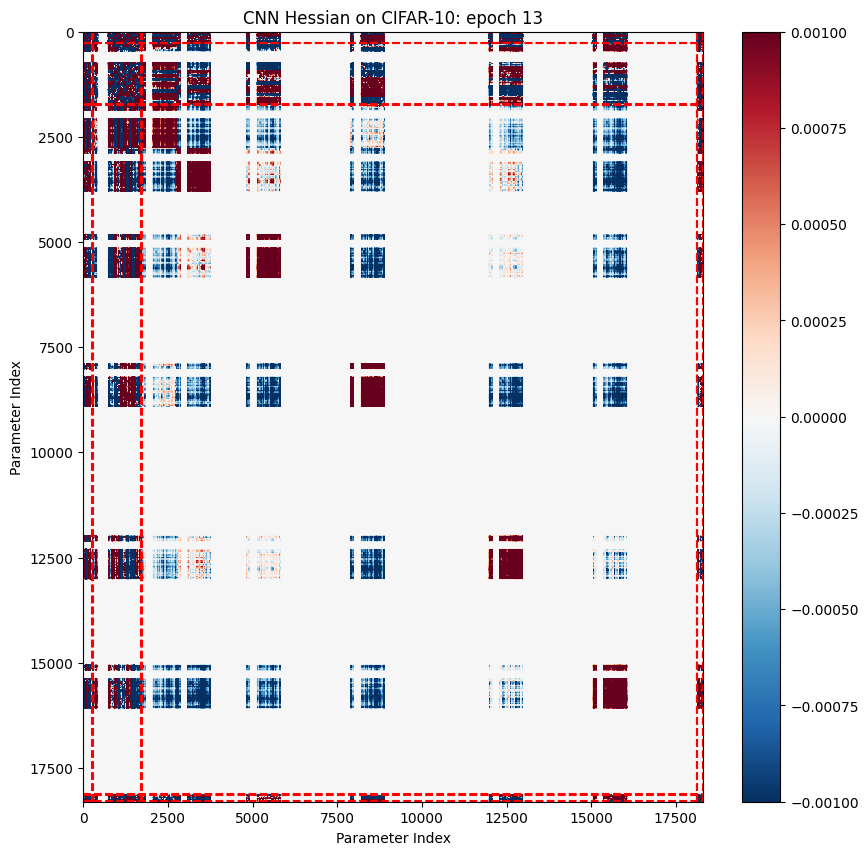

Epoch 13, step 0, train_loss 0.9202574491500854, test_loss 1.1478911638259888
Epoch 13, step 500, train_loss 1.2060866355895996, test_loss 1.1622962951660156
Epoch 13, step 1000, train_loss 1.2759844064712524, test_loss 1.1426210403442383
Epoch 13, step 1500, train_loss 1.1353373527526855, test_loss 1.2129021883010864


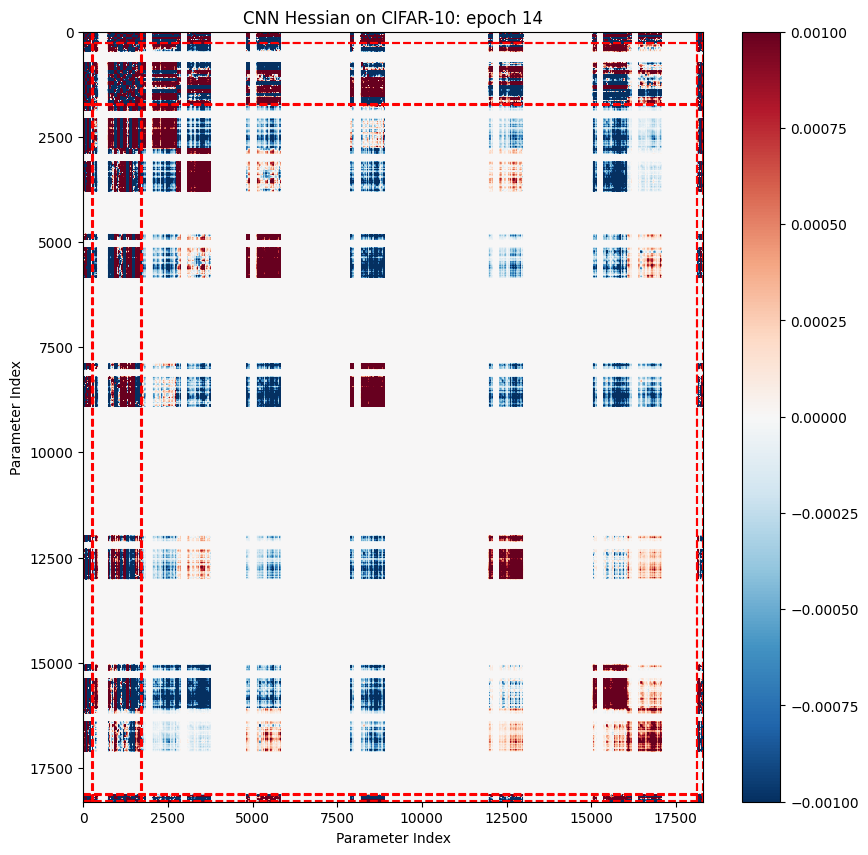

Epoch 14, step 0, train_loss 1.182835340499878, test_loss 1.1283327341079712
Epoch 14, step 500, train_loss 0.9331509470939636, test_loss 1.1320527791976929
Epoch 14, step 1000, train_loss 0.9036879539489746, test_loss 1.1124857664108276
Epoch 14, step 1500, train_loss 1.0427494049072266, test_loss 1.137764573097229


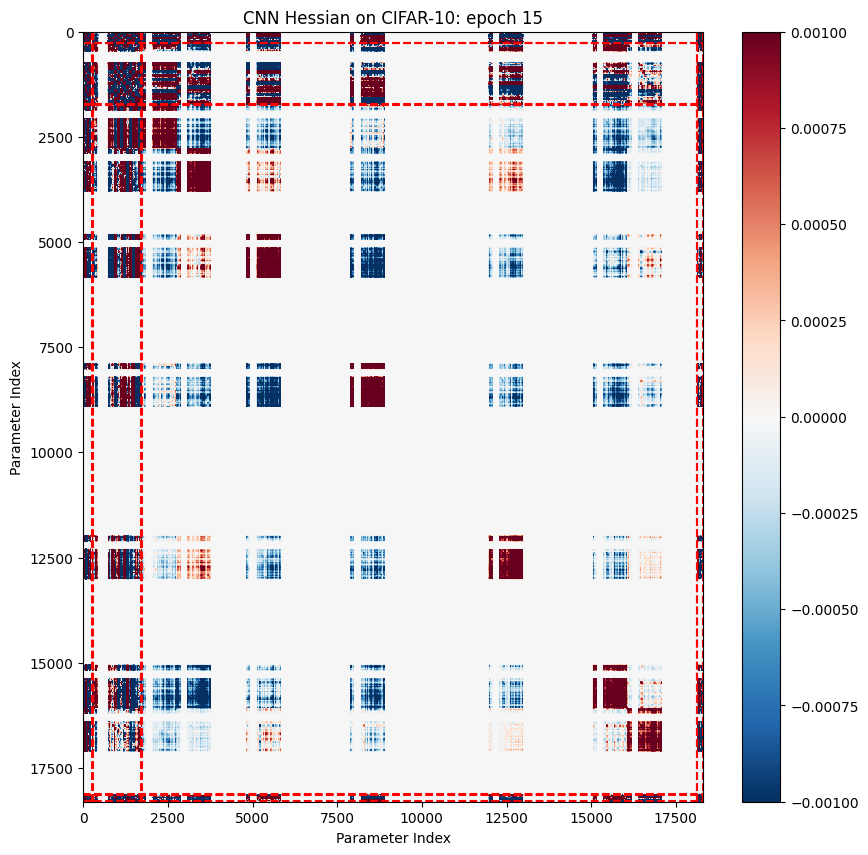

Epoch 15, step 0, train_loss 0.9595272541046143, test_loss 1.1118730306625366
Epoch 15, step 500, train_loss 0.9672713875770569, test_loss 1.1070635318756104
Epoch 15, step 1000, train_loss 1.3327186107635498, test_loss 1.1507872343063354
Epoch 15, step 1500, train_loss 0.952773928642273, test_loss 1.1093534231185913


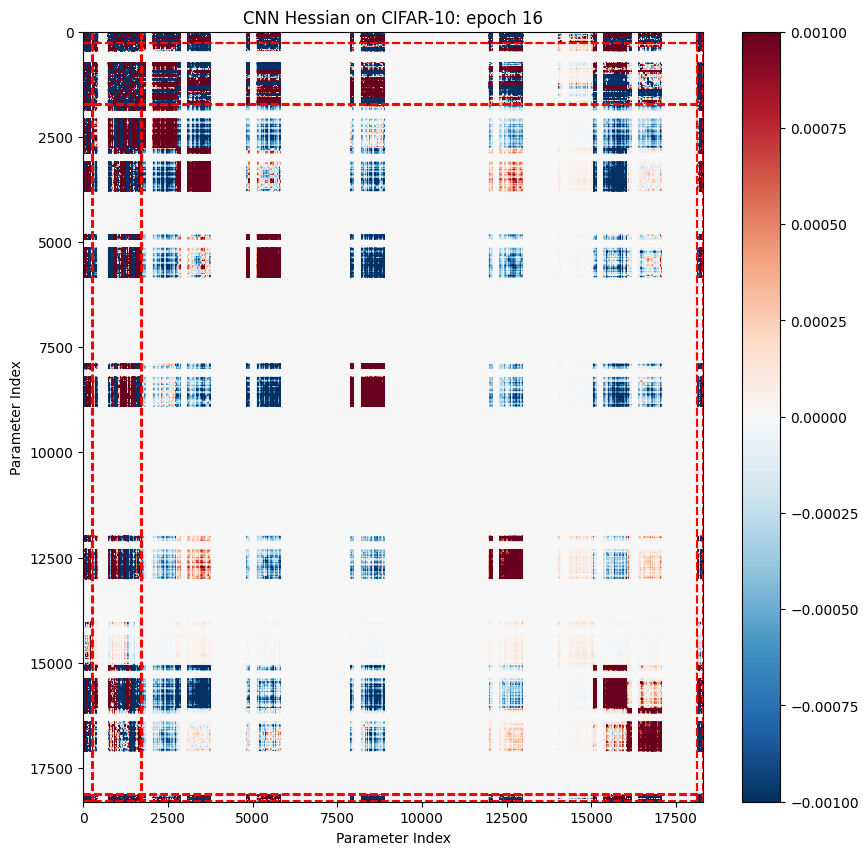

Epoch 16, step 0, train_loss 1.1377619504928589, test_loss 1.1174854040145874
Epoch 16, step 500, train_loss 0.8741618394851685, test_loss 1.1180232763290405
Epoch 16, step 1000, train_loss 0.7259964346885681, test_loss 1.0968552827835083
Epoch 16, step 1500, train_loss 0.9880216717720032, test_loss 1.1131865978240967


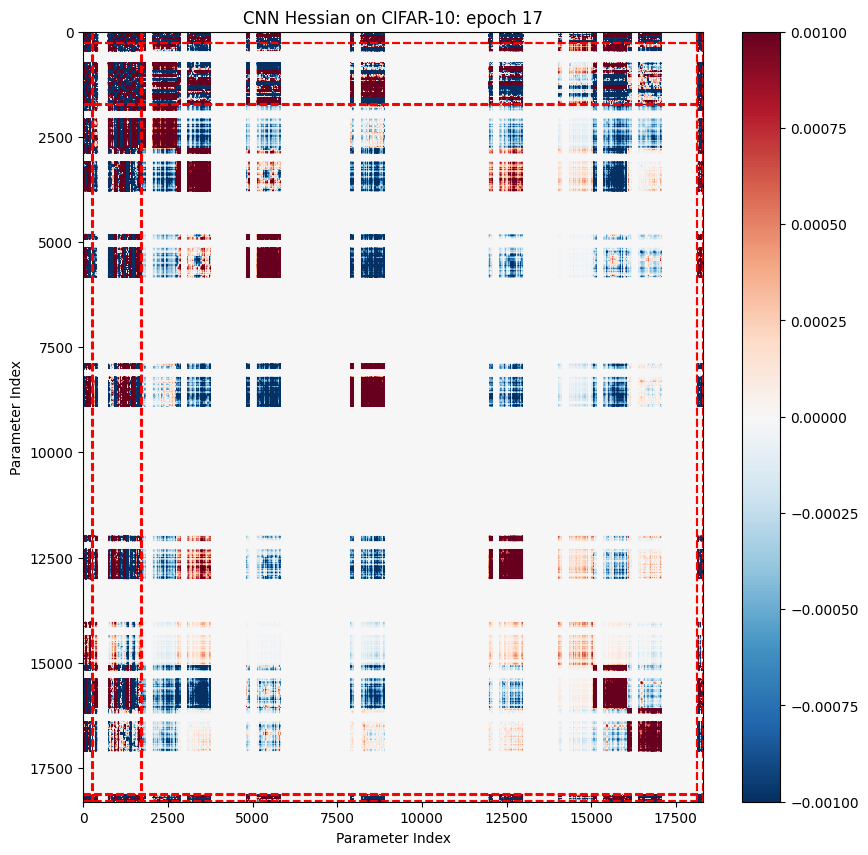

Epoch 17, step 0, train_loss 0.854394793510437, test_loss 1.1218984127044678
Epoch 17, step 500, train_loss 0.8207173347473145, test_loss 1.117020845413208
Epoch 17, step 1000, train_loss 1.2173709869384766, test_loss 1.105887532234192
Epoch 17, step 1500, train_loss 1.1403878927230835, test_loss 1.0908503532409668


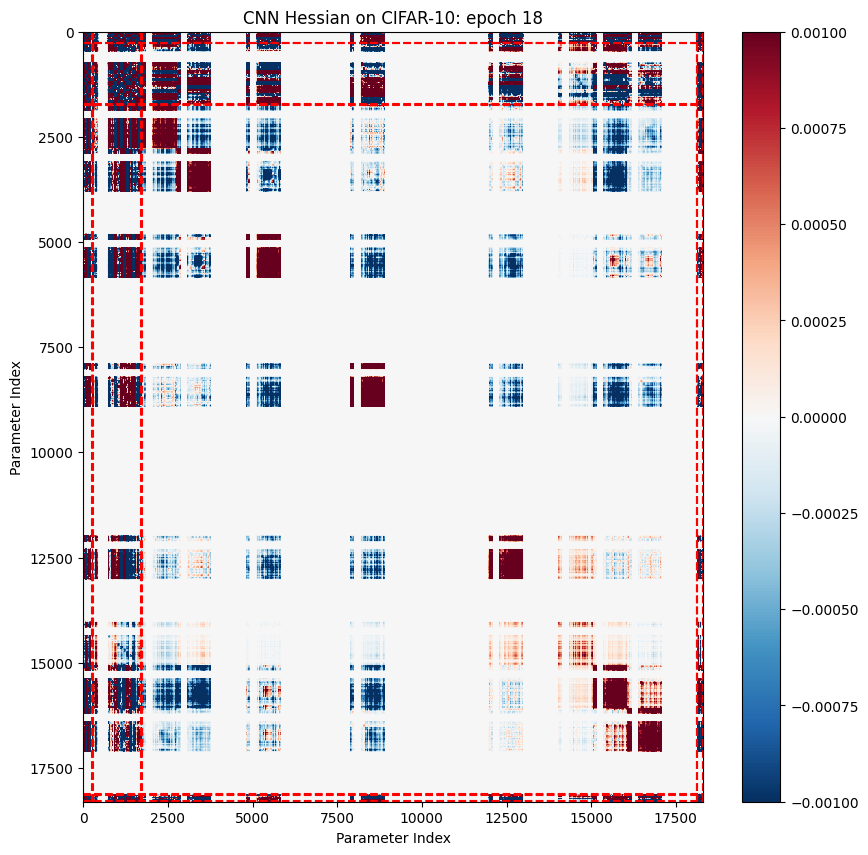

Epoch 18, step 0, train_loss 1.2714219093322754, test_loss 1.1238845586776733
Epoch 18, step 500, train_loss 1.0170429944992065, test_loss 1.1034066677093506
Epoch 18, step 1000, train_loss 0.9267268180847168, test_loss 1.0752500295639038
Epoch 18, step 1500, train_loss 0.9716066122055054, test_loss 1.097271203994751


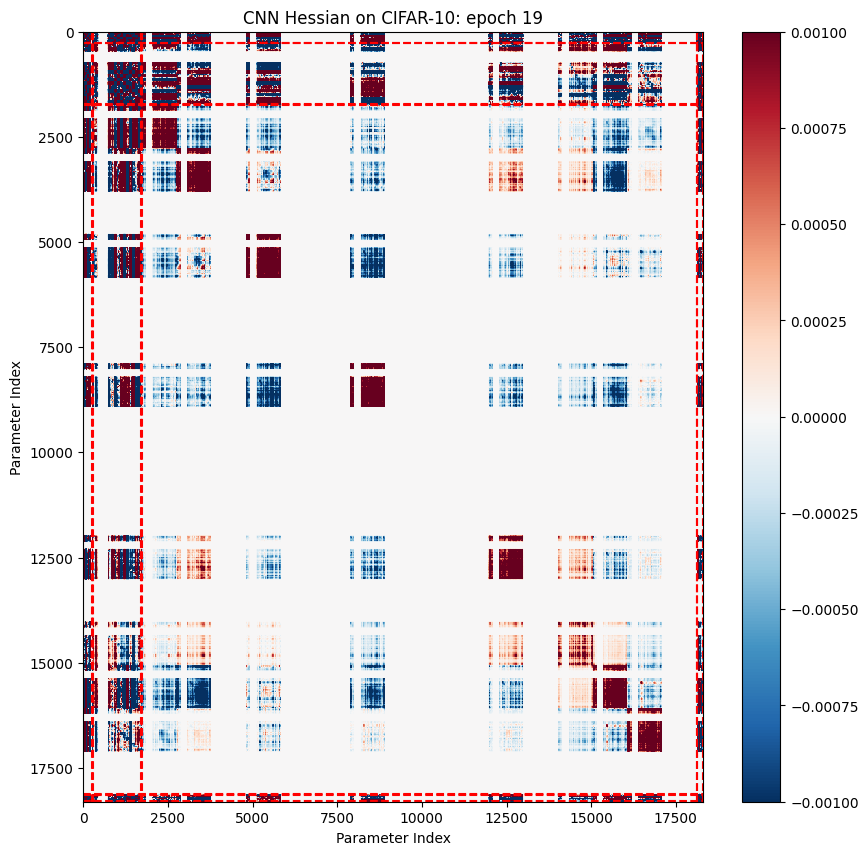

Epoch 19, step 0, train_loss 1.0223326683044434, test_loss 1.0829874277114868
Epoch 19, step 500, train_loss 0.7252044081687927, test_loss 1.0770984888076782
Epoch 19, step 1000, train_loss 0.9035107493400574, test_loss 1.0667200088500977
Epoch 19, step 1500, train_loss 0.7896557450294495, test_loss 1.0789916515350342


In [88]:
losses = []
test_losses = []
train_losses = []
for epoch in range(20):
    plot_hessian(model, criterion, x_samples, y_samples, title = f"CNN Hessian on CIFAR-10: epoch {epoch}", figsize=(10, 10), save_path = f"hessian_grid_heatmaps/epoch_{epoch}")
    for i, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        #output_test = model(test_X)
        loss = criterion(output, target)
        # loss_test = criterion(output_test, test_y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 500 == 0:
            output = model(val_x)
            loss_train = criterion(output, val_y)
            output = model(test_X)
            loss_test = criterion(output, test_y)
            print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}, test_loss {loss_test.item()}")
            output_test = model(test_X)
            test_losses.append(loss_test.item())
            train_losses.append(loss_train.item())
    #print(loss.item())
    
    


Test accuracy: 0.6197


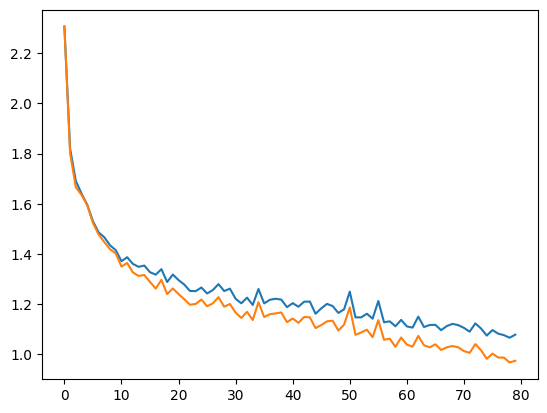

In [89]:
output = model(test_X)
_, predicted = torch.max(output, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / test_y.size(0)
print(f"Test accuracy: {accuracy}")
plt.plot(test_losses)
plt.plot(train_losses)
plt.show()